# 분류 분석

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
import seaborn as sns

## 로지스틱 회귀 모델 - 데이터 분할

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/lsda02/data/spam.xlsx', engine = 'openpyxl')
df.head()

,Record,Spam,Recipients,Hyperlinks,Characters
0,1,0,19,1,47
1,2,0,15,1,58
2,3,1,13,11,88
3,4,1,17,11,68
4,5,0,15,1,87


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Record      500 non-null    int64
 1   Spam        500 non-null    int64
 2   Recipients  500 non-null    int64
 3   Hyperlinks  500 non-null    int64
 4   Characters  500 non-null    int64
dtypes: int64(5)
memory usage: 19.7 KB


In [ ]:
df['Spam'].unique()

array([0, 1])

In [ ]:
df['Spam'].value_counts()

Spam
1    258
0    242
Name: count, dtype: int64

In [ ]:
df.columns

Index(['Record', 'Spam', 'Recipients', 'Hyperlinks', 'Characters'], dtype='object')

In [ ]:
# 전체 데이터
X = df.loc[:,['Recipients', 'Hyperlinks', 'Characters']]
y = df['Spam']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (500, 3)
y 데이터:  (500,)


In [ ]:
# 데이터 분할 = 훈련 데이터 / 테스트 데이터 = 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)
print("train 데이터: ", X_train.shape)
print("test 데이터: ", X_test.shape)

train 데이터:  (350, 3)
test 데이터:  (150, 3)


In [ ]:
# 로지스틱회귀모델
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression();logit.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# 성능 평가 - 정확도
print(logit.score(X_train, y_train))
print(logit.score(X_test, y_test))

0.7971428571428572
0.8


In [ ]:
# 계수 = 모델 파라미터
# 절편
intercept = round(logit.intercept_[0], 5);intercept

-3.46564

In [ ]:
# 기울기
slope = [round(x, 5) for x in logit.coef_[0]];print(slope)

[0.08576, 0.50352, -0.01526]


In [ ]:
for name, coef in zip(X.columns, slope):
  print("{}: {}".format(name, coef))

Recipients: 0.08576
Hyperlinks: 0.50352
Characters: -0.01526


In [ ]:
# 표본회귀식
equation = "y_hat = " + str(intercept)
for coef, name in zip(slope, X.columns):
  equation += " + {} * {}".format(coef, name)
print(equation)

y_hat = -3.46564 + 0.08576 * Recipients + 0.50352 * Hyperlinks + -0.01526 * Characters


In [ ]:
# 예측
y_train_pred = logit.predict(X_train)
y_test_pred = logit.predict(X_test)

In [ ]:
y_train_pred[:5]

array([0, 0, 1, 1, 0])

In [ ]:
y_train[:5]

5      0
116    0
45     1
16     1
462    0
Name: Spam, dtype: int64

In [ ]:
y_test_pred[:5]

array([1, 0, 1, 1, 1])

In [ ]:
y_test[:5]

361    0
73     0
374    1
155    1
104    1
Name: Spam, dtype: int64

In [ ]:
y_train_proba = logit.predict_proba(X_train)
y_test_proba = logit.predict_proba(X_test)

In [ ]:
y_train_proba[:5]

array([[0.8518, 0.1482],
       [0.5857, 0.4143],
       [0.1992, 0.8008],
       [0.1072, 0.8928],
       [0.7744, 0.2256]])

In [ ]:
y_test_proba[:5]

array([[0.1329, 0.8671],
       [0.9173, 0.0827],
       [0.0805, 0.9195],
       [0.2191, 0.7809],
       [0.0832, 0.9168]])

In [ ]:
logit.classes_

array([0, 1])

In [ ]:
zv1 = logit.decision_function(X_train)
zv2 = logit.decision_function(X_test)

In [ ]:
from scipy.special import expit
print(expit(zv1)[:5])
print(expit(zv2)[:5])
# 1 에 대한 확률값

[0.1482 0.4143 0.8008 0.8928 0.2256]
[0.8671 0.0827 0.9195 0.7809 0.9168]


In [ ]:
# 성능 평가
print(np.mean(y_train == y_train_pred))
print(np.mean(y_test == y_test_pred))

0.7971428571428572
0.8


In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
train_cm = confusion_matrix(y_train, y_train_pred)
print(train_cm)

[[138  34]
 [ 37 141]]


In [ ]:
from sklearn.metrics import confusion_matrix
test_cm = confusion_matrix(y_test, y_test_pred)
print(test_cm)

[[58 12]
 [18 62]]


In [ ]:
from sklearn.metrics import classification_report
train_rpt = classification_report(y_train, y_train_pred)
print(train_rpt)

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       172
           1       0.81      0.79      0.80       178

    accuracy                           0.80       350
   macro avg       0.80      0.80      0.80       350
weighted avg       0.80      0.80      0.80       350



In [ ]:
from sklearn.metrics import classification_report
test_rpt = classification_report(y_test, y_test_pred)
print(test_rpt)

              precision    recall  f1-score   support

           0       0.76      0.83      0.79        70
           1       0.84      0.78      0.81        80

    accuracy                           0.80       150
   macro avg       0.80      0.80      0.80       150
weighted avg       0.80      0.80      0.80       150



In [ ]:
# 문제 풀이
Recipients = 20; Hyperlinks = 5; Characters = 60
zv = -3.46564 + 0.08576 * Recipients + 0.50352 * Hyperlinks + -0.01526 * Characters
print(round(expit(zv), 5))
print(round(np.exp(zv) / (1 + np.exp(zv)),5))
print(round(1 / (1 + np.exp(-zv)),5))

0.46296
0.46296
0.46296


In [ ]:
y_test[:5]

361    0
73     0
374    1
155    1
104    1
Name: Spam, dtype: int64

In [ ]:
y_test_proba[:,0][:5]

array([0.1329, 0.9173, 0.0805, 0.2191, 0.0832])

In [ ]:
y_test_proba[:,1][:5]

array([0.8671, 0.0827, 0.9195, 0.7809, 0.9168])

In [ ]:
y_test_pred[:5]

array([1, 0, 1, 1, 1])

In [ ]:
logit_df = pd.DataFrame({'y': y_test,
                         'class_0_prob': y_test_proba[:,0],
                         'class_1_prob': y_test_proba[:,1],
                         'y_bin': y_test_pred})
logit_df

,y,class_0_prob,class_1_prob,y_bin
361,0,0.132891,0.867109,1
73,0,0.917296,0.082704,0
374,1,0.080476,0.919524,1
155,1,0.219087,0.780913,1
104,1,0.083156,0.916844,1
...,...,...,...,...
266,1,0.222679,0.777321,1
23,1,0.511319,0.488681,0
222,1,0.133984,0.866016,1
261,1,0.065752,0.934248,1


## 로지스틱 회귀 모델 - 이진분류

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/lsda02/data/breast-cancer-wisconsin.data',
                 header = None)
df.head()
# 10 cancer - benign 2, malignant 4

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
df.columns = ['id', 'clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial',
              'bare_nuclei', 'chromatin', 'normal_nucleoli', 'mitoses', 'class']

In [ ]:
df.head()

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               699 non-null    int64 
 1   clump            699 non-null    int64 
 2   cell_size        699 non-null    int64 
 3   cell_shape       699 non-null    int64 
 4   adhesion         699 non-null    int64 
 5   epithlial        699 non-null    int64 
 6   bare_nuclei      699 non-null    object
 7   chromatin        699 non-null    int64 
 8   normal_nucleoli  699 non-null    int64 
 9   mitoses          699 non-null    int64 
 10  class            699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [ ]:
df['bare_nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [ ]:
df[df['bare_nuclei'] == '?']

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [ ]:
df['bare_nuclei'] = df['bare_nuclei'].replace('?', np.nan)

In [ ]:
df['bare_nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', nan, '5', '8', '6'],
      dtype=object)

In [ ]:
df['bare_nuclei'].value_counts(dropna = False)

bare_nuclei
1      402
10     132
2       30
5       30
3       28
8       21
4       19
NaN     16
9        9
7        8
6        4
Name: count, dtype: int64

In [ ]:
df = df.dropna(subset = ['bare_nuclei'], axis = 0)
df.head()

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
df['bare_nuclei']

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: bare_nuclei, Length: 683, dtype: object

In [ ]:
df['bare_nuclei'] = df['bare_nuclei'].astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               683 non-null    int64
 1   clump            683 non-null    int64
 2   cell_size        683 non-null    int64
 3   cell_shape       683 non-null    int64
 4   adhesion         683 non-null    int64
 5   epithlial        683 non-null    int64
 6   bare_nuclei      683 non-null    int64
 7   chromatin        683 non-null    int64
 8   normal_nucleoli  683 non-null    int64
 9   mitoses          683 non-null    int64
 10  class            683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB


In [ ]:
df.columns

Index(['id', 'clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial',
       'bare_nuclei', 'chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

In [ ]:
# 전체 데이터
X = df.drop(['id', 'class'], axis = 1)
y = df['class']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (683, 9)
y 데이터:  (683,)


In [ ]:
# 데이터 분할 = 훈련 데이터 / 테스트 데이터 = 7:3
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)
print("train 데이터: ", X_train.shape)
print("test 데이터: ", X_test.shape)

train 데이터:  (478, 9)
test 데이터:  (205, 9)


In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
standard.fit(X_train)
X_train_scale = standard.transform(X_train)
X_test_scale = standard.transform(X_test)

In [ ]:
# 로지스틱회귀모델
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression();logit.fit(X_train_scale, y_train)

LogisticRegression()

In [ ]:
# 정확도
print(logit.score(X_train_scale, y_train))
print(logit.score(X_test_scale, y_test))

0.9748953974895398
0.9560975609756097


In [ ]:
# 계수 = 모델 파라미터
# 절편
intercept = logit.intercept_[0];intercept

-1.4684041582158878

In [ ]:
# 기울기
slope = [round(x, 5) for x in logit.coef_[0]];print(slope)

[1.18565, 0.18587, 0.70738, 0.59957, 0.02328, 1.51274, 1.03451, 0.52025, 0.74539]


In [ ]:
for name, coef in zip(X.columns, slope):
  print("{}: {}".format(name, coef))

clump: 1.18565
cell_size: 0.18587
cell_shape: 0.70738
adhesion: 0.59957
epithlial: 0.02328
bare_nuclei: 1.51274
chromatin: 1.03451
normal_nucleoli: 0.52025
mitoses: 0.74539


In [ ]:
# 표본회귀식
equation = "y_hat = " + str(intercept)
for coef, name in zip(slope, X.columns):
  equation += " + {} * {}".format(coef, name)
print(equation)

y_hat = -1.4684041582158878 + 1.18565 * clump + 0.18587 * cell_size + 0.70738 * cell_shape + 0.59957 * adhesion + 0.02328 * epithlial + 1.51274 * bare_nuclei + 1.03451 * chromatin + 0.52025 * normal_nucleoli + 0.74539 * mitoses


In [ ]:
# 예측
y_train_pred = logit.predict(X_train_scale)
y_test_pred = logit.predict(X_test_scale)

In [ ]:
print(y_train_pred[:5])
print(y_train.values[:5])

[4 2 2 4 2]
[4 2 2 4 2]


In [ ]:
print(y_test_pred[:5])
print(y_test.values[:5])

[4 4 2 2 2]
[4 4 2 2 2]


In [ ]:
y_train_proba = logit.predict_proba(X_train_scale)
y_test_proba = logit.predict_proba(X_test_scale)

In [ ]:
y_train_proba[:5]

array([[0.0017, 0.9983],
       [0.9889, 0.0111],
       [0.9668, 0.0332],
       [0.0037, 0.9963],
       [0.9987, 0.0013]])

In [ ]:
y_test_proba[:5]

array([[0.0188, 0.9812],
       [0.0001, 0.9999],
       [0.9968, 0.0032],
       [0.9949, 0.0051],
       [0.9979, 0.0021]])

In [ ]:
logit.classes_

array([2, 4])

In [ ]:
zv1 = logit.decision_function(X_train_scale)
zv2 = logit.decision_function(X_test_scale)

In [ ]:
from scipy.special import expit
print(expit(zv1)[:5])
print(expit(zv2)[:5])

[0.9983 0.0111 0.0332 0.9963 0.0013]
[0.9812 0.9999 0.0032 0.0051 0.0021]


In [ ]:
# 성능 평가
# 정확도
print(np.mean(y_train == y_train_pred))
print(np.mean(y_test == y_test_pred))

0.9748953974895398
0.9560975609756097


In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)
print(train_cm)
print(test_cm)

[[311   6]
 [  6 155]]
[[125   2]
 [  7  71]]


In [ ]:
from sklearn.metrics import classification_report
train_rpt = classification_report(y_train, y_train_pred)
test_rpt = classification_report(y_test, y_test_pred)
print(train_rpt)
print(test_rpt)

              precision    recall  f1-score   support

           2       0.98      0.98      0.98       317
           4       0.96      0.96      0.96       161

    accuracy                           0.97       478
   macro avg       0.97      0.97      0.97       478
weighted avg       0.97      0.97      0.97       478

              precision    recall  f1-score   support

           2       0.95      0.98      0.97       127
           4       0.97      0.91      0.94        78

    accuracy                           0.96       205
   macro avg       0.96      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205



In [ ]:
pd.get_dummies(y_test_pred)

,2,4
0,False,True
1,False,True
2,True,False
3,True,False
4,True,False
...,...,...
200,False,True
201,False,True
202,False,True
203,True,False


아래 4번이 양성클래스

[[125   2]

 [  7  71]]

In [ ]:
y_test_dm = pd.get_dummies(y_test).iloc[:,1]
y_test_pred_dm = pd.get_dummies(y_test_pred).iloc[:,1]
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc = accuracy_score(y_test_dm, y_test_pred_dm);print(acc)
pre = precision_score(y_test_dm, y_test_pred_dm);print(pre)
rec = recall_score(y_test_dm, y_test_pred_dm);print(rec)
f1 = f1_score(y_test_dm, y_test_pred_dm);print(f1)

0.9560975609756097
0.9726027397260274
0.9102564102564102
0.9403973509933774


In [ ]:
# 정확도
acc = (125 + 71) / (125 + 2 + 7 + 71);print(acc)

0.9560975609756097


In [ ]:
# 정밀도 = 위 아래
pre = 71 / (71 + 2);print(pre)

0.9726027397260274


In [ ]:
# 재현율 = 좌 우 = 민감도
rec = 71 / (71 + 7);print(rec)

0.9102564102564102


In [ ]:
# f1 점수
f1 = 2*pre*rec/(pre + rec);print(f1)

0.9403973509933774


위 2번이 양성클래스

[[125   2]

 [  7  71]]

In [ ]:
# 복습할 때 직접 해보기

## 로지스틱 회귀 모델 - 다중분류

In [ ]:
from sklearn import datasets

In [ ]:
wine_data = datasets.load_wine()

In [ ]:
wine_data

{'data': array([[  14.23,    1.71,    2.43, ...,    1.04,    3.92, 1065.  ],
        [  13.2 ,    1.78,    2.14, ...,    1.05,    3.4 , 1050.  ],
        [  13.16,    2.36,    2.67, ...,    1.03,    3.17, 1185.  ],
        ...,
        [  13.27,    4.28,    2.26, ...,    0.59,    1.56,  835.  ],
        [  13.17,    2.59,    2.37, ...,    0.6 ,    1.62,  840.  ],
        [  14.13,    4.1 ,    2.74, ...,    0.61,    1.6 ,  560.  ]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [ ]:
# 특성
wine_data['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
# 타깃
wine_data['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [ ]:
df = pd.DataFrame(wine_data.data, columns = wine_data.feature_names)

In [ ]:
df['class'] = wine_data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

In [ ]:
df['class'].unique()

array([0, 1, 2])

In [ ]:
df['class'].value_counts()

class
1    71
0    59
2    48
Name: count, dtype: int64

In [ ]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'class'],
      dtype='object')

In [ ]:
# 전체 데이터
X = df.drop('class', axis = 1)
y = df['class']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (178, 13)
y 데이터:  (178,)


In [ ]:
# 데이터 분할 = 훈련 데이터 / 테스트 데이터 = 7:3
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)
print("train 데이터: ", X_train.shape)
print("test 데이터: ", X_test.shape)

train 데이터:  (124, 13)
test 데이터:  (54, 13)


In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
standard.fit(X_train)
X_train_scale = standard.transform(X_train)
X_test_scale = standard.transform(X_test)

In [ ]:
# 로지스틱회귀모델
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression();logit.fit(X_train_scale, y_train)

LogisticRegression()

In [ ]:
# 정확도
print(logit.score(X_train_scale, y_train))
print(logit.score(X_test_scale, y_test))

1.0
0.9814814814814815


In [ ]:
# 계수 = 모델 파라미터
# 절편
intercept = logit.intercept_[0];intercept

0.36326409489843425

In [ ]:
# 기울기
slope = [round(x, 5) for x in logit.coef_[0]];print(slope)

[0.78223, 0.11437, 0.47716, -0.83001, 0.04456, 0.36769, 0.52559, -0.05432, 0.18612, 0.16577, 0.07018, 0.59553, 0.90271]


In [ ]:
for name, coef in zip(X.columns, slope):
  print("{}: {}".format(name, coef))

alcohol: 0.78223
malic_acid: 0.11437
ash: 0.47716
alcalinity_of_ash: -0.83001
magnesium: 0.04456
total_phenols: 0.36769
flavanoids: 0.52559
nonflavanoid_phenols: -0.05432
proanthocyanins: 0.18612
color_intensity: 0.16577
hue: 0.07018
od280/od315_of_diluted_wines: 0.59553
proline: 0.90271


In [ ]:
# 표본회귀식
equation = "y_hat = " + str(intercept)
for coef, name in zip(slope, X.columns):
  equation += " + {} * {}".format(coef, name)
print(equation)

y_hat = 0.36326409489843425 + 0.78223 * alcohol + 0.11437 * malic_acid + 0.47716 * ash + -0.83001 * alcalinity_of_ash + 0.04456 * magnesium + 0.36769 * total_phenols + 0.52559 * flavanoids + -0.05432 * nonflavanoid_phenols + 0.18612 * proanthocyanins + 0.16577 * color_intensity + 0.07018 * hue + 0.59553 * od280/od315_of_diluted_wines + 0.90271 * proline


In [ ]:
# 예측
y_train_pred = logit.predict(X_train_scale)
y_test_pred = logit.predict(X_test_scale)

In [ ]:
print(y_train_pred[:5])
print(y_train.values[:5])

[2 1 1 0 1]
[2 1 1 0 1]


In [ ]:
print(y_test_pred[:5])
print(y_test.values[:5])

[0 0 2 0 1]
[0 0 2 0 1]


In [ ]:
y_train_proba = logit.predict_proba(X_train_scale)
y_test_proba = logit.predict_proba(X_test_scale)

In [ ]:
y_train_proba[:5]

array([[0.0094, 0.0321, 0.9586],
       [0.007 , 0.9926, 0.0004],
       [0.025 , 0.9741, 0.0008],
       [0.9888, 0.0056, 0.0056],
       [0.0032, 0.9967, 0.0001]])

In [ ]:
y_test_proba[:5]

array([[0.9969, 0.0018, 0.0013],
       [0.9934, 0.0006, 0.006 ],
       [0.0131, 0.0281, 0.9589],
       [0.9926, 0.0066, 0.0008],
       [0.0031, 0.9964, 0.0006]])

In [ ]:
logit.classes_

array([0, 1, 2])

In [ ]:
zv1 = logit.decision_function(X_train_scale)
zv2 = logit.decision_function(X_test_scale)

In [ ]:
# 이진분류 = 로지스틱 함수
# 다중분류 = 소프트맥스 함수
from scipy.special import softmax
print(softmax(zv1, axis = 1)[:5])
print(softmax(zv2, axis = 1)[:5])

[[0.0094 0.0321 0.9586]
 [0.007  0.9926 0.0004]
 [0.025  0.9741 0.0008]
 [0.9888 0.0056 0.0056]
 [0.0032 0.9967 0.0001]]
[[0.9969 0.0018 0.0013]
 [0.9934 0.0006 0.006 ]
 [0.0131 0.0281 0.9589]
 [0.9926 0.0066 0.0008]
 [0.0031 0.9964 0.0006]]


In [ ]:
# 성능 평가
# 정확도
print(np.mean(y_train == y_train_pred))
print(np.mean(y_test == y_test_pred))

1.0
0.9814814814814815


In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)
print(train_cm)
print(test_cm)

[[40  0  0]
 [ 0 50  0]
 [ 0  0 34]]
[[19  0  0]
 [ 0 20  1]
 [ 0  0 14]]


In [ ]:
from sklearn.metrics import classification_report
train_rpt = classification_report(y_train, y_train_pred)
test_rpt = classification_report(y_test, y_test_pred)
print(train_rpt)
print(test_rpt)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        34

    accuracy                           1.00       124
   macro avg       1.00      1.00      1.00       124
weighted avg       1.00      1.00      1.00       124

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        21
           2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



## 로지스틱 손실 함수

In [ ]:
# 음수를 취하면 최종값이 양수가 되어 해석이 쉬움
# 타깃이 1
# 확률이 1에서 멀어질수록 큰 양수
print(-np.log(0.8))
print(-np.log(0.4))

0.2231435513142097
0.916290731874155


In [ ]:
# 타깃이 0
# 0에서 멀어질수록 큰 양수, 큰 양수 = 손실이 크다
# 0.3 * 0 => 0.7 * 1
print(-np.log(0.7))
# 0.9 * 0 => 0.1 * 1
print(-np.log(0.1))

0.35667494393873245
2.3025850929940455


## SGD - 이진분류

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/lsda02/data/breast-cancer-wisconsin.data',
                 header = None)

In [ ]:
df.columns = ['id', 'clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial',
              'bare_nuclei', 'chromatin', 'normal_nucleoli', 'mitoses', 'class']

In [ ]:
df.head()

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               699 non-null    int64 
 1   clump            699 non-null    int64 
 2   cell_size        699 non-null    int64 
 3   cell_shape       699 non-null    int64 
 4   adhesion         699 non-null    int64 
 5   epithlial        699 non-null    int64 
 6   bare_nuclei      699 non-null    object
 7   chromatin        699 non-null    int64 
 8   normal_nucleoli  699 non-null    int64 
 9   mitoses          699 non-null    int64 
 10  class            699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [ ]:
df['bare_nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [ ]:
df[df['bare_nuclei'] == '?']

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [ ]:
df['bare_nuclei'] = df['bare_nuclei'].replace('?', np.nan)

In [ ]:
df['bare_nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', nan, '5', '8', '6'],
      dtype=object)

In [ ]:
df['bare_nuclei'].value_counts(dropna = False)

bare_nuclei
1      402
10     132
2       30
5       30
3       28
8       21
4       19
NaN     16
9        9
7        8
6        4
Name: count, dtype: int64

In [ ]:
df = df.dropna(subset = ['bare_nuclei'], axis = 0)
df.head()

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
df['bare_nuclei']

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: bare_nuclei, Length: 683, dtype: object

In [ ]:
df['bare_nuclei'] = df['bare_nuclei'].astype('int')

<ipython-input-148-ee5187ccd0b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bare_nuclei'] = df['bare_nuclei'].astype('int')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               683 non-null    int64
 1   clump            683 non-null    int64
 2   cell_size        683 non-null    int64
 3   cell_shape       683 non-null    int64
 4   adhesion         683 non-null    int64
 5   epithlial        683 non-null    int64
 6   bare_nuclei      683 non-null    int64
 7   chromatin        683 non-null    int64
 8   normal_nucleoli  683 non-null    int64
 9   mitoses          683 non-null    int64
 10  class            683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB


In [ ]:
df.columns

Index(['id', 'clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial',
       'bare_nuclei', 'chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

In [ ]:
# 전체 데이터
X = df.drop(['id', 'class'], axis = 1)
y = df['class']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (683, 9)
y 데이터:  (683,)


In [ ]:
# 데이터 분할 = 훈련 데이터 / 테스트 데이터 = 7:3
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)
print("train 데이터: ", X_train.shape)
print("test 데이터: ", X_test.shape)

train 데이터:  (478, 9)
test 데이터:  (205, 9)


In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
standard.fit(X_train)
X_train_scale = standard.transform(X_train)
X_test_scale = standard.transform(X_test)

In [ ]:
# SGD
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = "log_loss", max_iter = 10, random_state = 42)
sgd.fit(X_train_scale, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

In [ ]:
# 정확도
print(sgd.score(X_train_scale, y_train))
print(sgd.score(X_test_scale, y_test))

0.9309623430962343
0.8878048780487805


In [ ]:
# 점진적 학습
sgd.partial_fit(X_train_scale, y_train)
# 정확도
print(sgd.score(X_train_scale, y_train))
print(sgd.score(X_test_scale, y_test))
# 언제까지 반복해야할지에 대한 기준이 없음

0.9728033472803347
0.9658536585365853


In [ ]:
# 반복
# SGD
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = "log_loss", random_state = 42)

In [ ]:
classes = np.unique(y_train);classes

array([2, 4])

In [ ]:
train_score = []
test_score = []
for i in range(200):
  # 점진적 학습
  sgd.partial_fit(X_train_scale, y_train, classes=classes)
  # 정확도
  train_score.append(sgd.score(X_train_scale, y_train))
  test_score.append(sgd.score(X_test_scale, y_test))

In [ ]:
print(train_score)
print(test_score)

[0.9707112970711297, 0.9686192468619247, 0.9665271966527197, 0.9728033472803347, 0.9623430962343096, 0.9665271966527197, 0.9728033472803347, 0.9728033472803347, 0.9665271966527197, 0.9769874476987448, 0.9686192468619247, 0.9686192468619247, 0.9707112970711297, 0.9728033472803347, 0.9665271966527197, 0.9707112970711297, 0.9686192468619247, 0.9707112970711297, 0.9707112970711297, 0.9707112970711297, 0.9707112970711297, 0.9707112970711297, 0.9728033472803347, 0.9728033472803347, 0.9728033472803347, 0.9728033472803347, 0.9728033472803347, 0.9769874476987448, 0.9790794979079498, 0.9769874476987448, 0.9748953974895398, 0.9748953974895398, 0.9748953974895398, 0.9748953974895398, 0.9748953974895398, 0.9748953974895398, 0.9769874476987448, 0.9769874476987448, 0.9769874476987448, 0.9769874476987448, 0.9769874476987448, 0.9769874476987448, 0.9769874476987448, 0.9769874476987448, 0.9769874476987448, 0.9769874476987448, 0.9769874476987448, 0.9769874476987448, 0.9769874476987448, 0.9748953974895398,

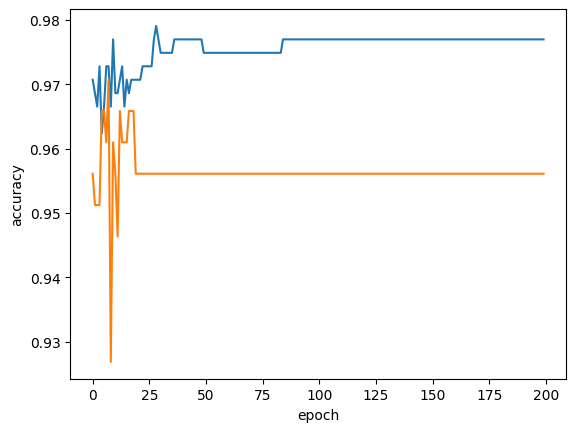

In [ ]:
# 손실곡선
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

In [ ]:
epoch_index = slice(0,30)
print(train_score[epoch_index])
print(test_score[epoch_index])

[0.9707112970711297, 0.9686192468619247, 0.9665271966527197, 0.9728033472803347, 0.9623430962343096, 0.9665271966527197, 0.9728033472803347, 0.9728033472803347, 0.9665271966527197, 0.9769874476987448, 0.9686192468619247, 0.9686192468619247, 0.9707112970711297, 0.9728033472803347, 0.9665271966527197, 0.9707112970711297, 0.9686192468619247, 0.9707112970711297, 0.9707112970711297, 0.9707112970711297, 0.9707112970711297, 0.9707112970711297, 0.9728033472803347, 0.9728033472803347, 0.9728033472803347, 0.9728033472803347, 0.9728033472803347, 0.9769874476987448, 0.9790794979079498, 0.9769874476987448]
[0.9560975609756097, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9658536585365853, 0.9658536585365853, 0.9609756097560975, 0.9707317073170731, 0.926829268292683, 0.9609756097560975, 0.9560975609756097, 0.9463414634146341, 0.9658536585365853, 0.9609756097560975, 0.9609756097560975, 0.9609756097560975, 0.9658536585365853, 0.9658536585365853, 0.9658536585365853, 0.9560975609756097,

In [ ]:
pd.Series(train_score[epoch_index]) - pd.Series(test_score[epoch_index])

0     0.014614
1     0.017400
2     0.015308
3     0.021584
4    -0.003511
5     0.000674
6     0.011828
7     0.002072
8     0.039698
9     0.016012
10    0.012522
11    0.022278
12    0.004858
13    0.011828
14    0.005552
15    0.009736
16    0.002766
17    0.004858
18    0.004858
19    0.014614
20    0.014614
21    0.014614
22    0.016706
23    0.016706
24    0.016706
25    0.016706
26    0.016706
27    0.020890
28    0.022982
29    0.020890
dtype: float64

In [ ]:
# epoch = 30
# SGD
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = "log_loss", max_iter = 30, random_state = 42)
sgd.fit(X_train_scale, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='log_loss', max_iter=30, random_state=42)

In [ ]:
# 정확도
print(sgd.score(X_train_scale, y_train))
print(sgd.score(X_test_scale, y_test))

0.9707112970711297
0.9707317073170731


In [ ]:
# 손실함수 값
# SGD
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = "log_loss", max_iter = 200, tol = 0.001, random_state = 42)
sgd.fit(X_train_scale, y_train)

SGDClassifier(loss='log_loss', max_iter=200, random_state=42)

In [ ]:
# 정확도
print(sgd.score(X_train_scale, y_train))
print(sgd.score(X_test_scale, y_test))

0.9769874476987448
0.9609756097560975


In [ ]:
sgd.n_iter_

33

## SGD - 다중분류

In [ ]:
wine_data = datasets.load_wine()

In [ ]:
# 특성
wine_data['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
# 타깃
wine_data['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [ ]:
df = pd.DataFrame(wine_data.data, columns = wine_data.feature_names)

In [ ]:
df['class'] = wine_data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

In [ ]:
df['class'].unique()

array([0, 1, 2])

In [ ]:
df['class'].value_counts()

class
1    71
0    59
2    48
Name: count, dtype: int64

In [ ]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'class'],
      dtype='object')

In [ ]:
# 전체 데이터
X = df.drop('class', axis = 1)
y = df['class']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (178, 13)
y 데이터:  (178,)


In [ ]:
# 데이터 분할 = 훈련 데이터 / 테스트 데이터 = 7:3
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)
print("train 데이터: ", X_train.shape)
print("test 데이터: ", X_test.shape)

train 데이터:  (124, 13)
test 데이터:  (54, 13)


In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
standard.fit(X_train)
X_train_scale = standard.transform(X_train)
X_test_scale = standard.transform(X_test)

In [ ]:
# SGD
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = "log_loss", max_iter = 10, random_state = 42)
sgd.fit(X_train_scale, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

In [ ]:
# 정확도
print(sgd.score(X_train_scale, y_train))
print(sgd.score(X_test_scale, y_test))

1.0
1.0


In [ ]:
# 점진적 학습
sgd.partial_fit(X_train_scale, y_train)
# 정확도
print(sgd.score(X_train_scale, y_train))
print(sgd.score(X_test_scale, y_test))
# 언제까지 반복해야할지에 대한 기준이 없음

1.0
0.9814814814814815


In [ ]:
# 반복
# SGD
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = "log_loss", random_state = 42)

In [ ]:
classes = np.unique(y_train);classes

array([0, 1, 2])

In [ ]:
train_score = []
test_score = []
for i in range(200):
  # 점진적 학습
  sgd.partial_fit(X_train_scale, y_train, classes=classes)
  # 정확도
  train_score.append(sgd.score(X_train_scale, y_train))
  test_score.append(sgd.score(X_test_scale, y_test))

In [ ]:
print(train_score)
print(test_score)

[0.967741935483871, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 

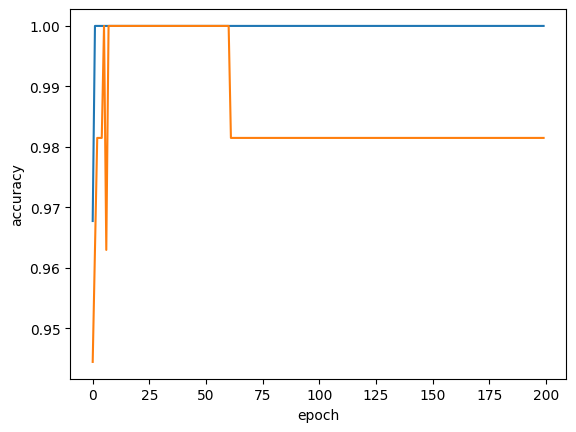

In [ ]:
# 손실곡선
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

In [ ]:
epoch_index = slice(10,20)
print(train_score[epoch_index])
print(test_score[epoch_index])

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [ ]:
pd.Series(train_score[epoch_index]) - pd.Series(test_score[epoch_index])

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
dtype: float64

In [ ]:
# epoch = 10
# SGD
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = "log_loss", max_iter = 10, random_state = 42)
sgd.fit(X_train_scale, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

In [ ]:
# 정확도
print(sgd.score(X_train_scale, y_train))
print(sgd.score(X_test_scale, y_test))

1.0
1.0


In [ ]:
# 손실함수 값
# SGD
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = "log_loss", max_iter = 200, tol = 0.001, random_state = 42)
sgd.fit(X_train_scale, y_train)

SGDClassifier(loss='log_loss', max_iter=200, random_state=42)

In [ ]:
# 정확도
print(sgd.score(X_train_scale, y_train))
print(sgd.score(X_test_scale, y_test))

1.0
1.0


In [ ]:
sgd.n_iter_

11

## KNN 살펴보기

### 데이터 준비

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/lsda02/data/gym_data.xlsx', engine = 'openpyxl')
df.head()
# 피트니스센터 회원권 등록여부, 참여자의 나이, 연봉, 주당 평균 운동시간

,Enroll,Age,Income,Hours
0,1,26,18000,14
1,0,43,13000,9
2,1,55,42000,16
3,1,55,100000,13
4,0,55,13000,12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Enroll  1000 non-null   int64
 1   Age     1000 non-null   int64
 2   Income  1000 non-null   int64
 3   Hours   1000 non-null   int64
dtypes: int64(4)
memory usage: 31.4 KB


In [ ]:
df['Enroll'].unique()

array([1, 0])

In [ ]:
df['Enroll'].value_counts()

Enroll
0    597
1    403
Name: count, dtype: int64

In [ ]:
df.columns

Index(['Enroll', 'Age', 'Income', 'Hours'], dtype='object')

In [ ]:
df.loc[:,['Age','Income']].describe()

,Age,Income
count,1000.000000,1000.000000
mean,44.582000,68340.000000
std,13.876737,44466.928247
min,21.000000,1000.000000
25%,32.000000,31000.000000
50%,45.000000,64000.000000
75%,57.000000,97000.000000
max,68.000000,198000.000000


In [ ]:
# 전체 데이터
X = df.loc[:,['Age','Income']]
y = df['Enroll']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (1000, 2)
y 데이터:  (1000,)


In [ ]:
# 데이터 분할 = 훈련 데이터 / 테스트 데이터 = 7:3
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)
print("train 데이터: ", X_train.shape)
print("test 데이터: ", X_test.shape)

train 데이터:  (700, 2)
test 데이터:  (300, 2)


### 모델 적용 - 원데이터

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# k 기본값 5
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# 정확도
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.84
0.7633333333333333


In [ ]:
X_train_array = np.column_stack((X_train.loc[:, 'Age'], X_train.loc[:, 'Income']))

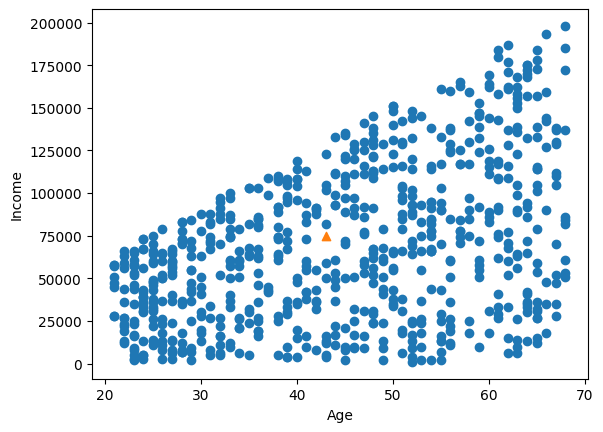

In [ ]:
# 산점도
plt.scatter(X_train_array[:,0], X_train_array[:,1])
plt.scatter(43, 75000, marker = '^') # new data point
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [ ]:
distance, indexes = knn.kneighbors([[43, 75000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
indexes

array([[684, 481, 340, 240, 608]])

In [ ]:
distance

array([[10., 10., 11., 15., 18.]])

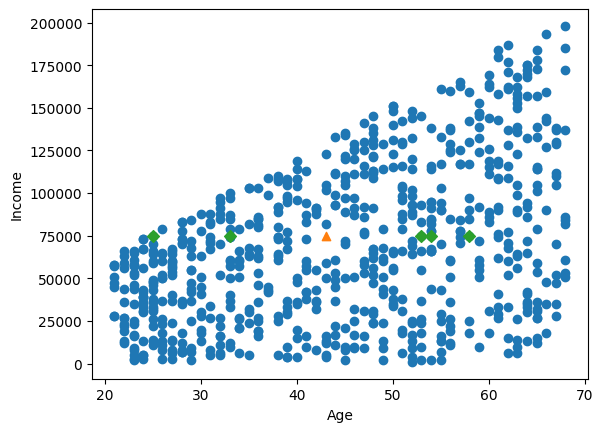

In [ ]:
# 산점도
plt.scatter(X_train_array[:,0], X_train_array[:,1])
plt.scatter(43, 75000, marker = '^')
plt.scatter(X_train_array[indexes,0], X_train_array[indexes,1], marker = 'D') # nearest data points
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

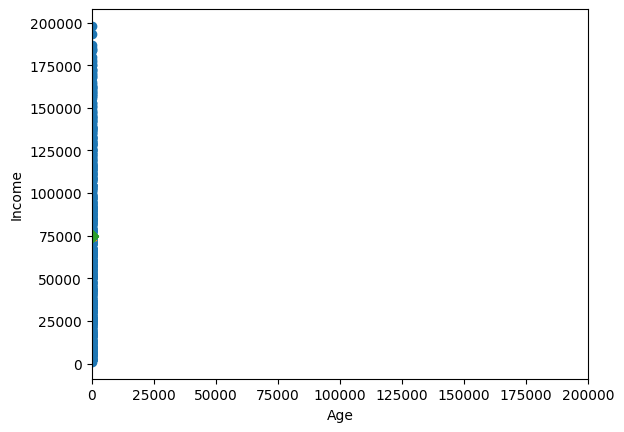

In [ ]:
# 산점도
plt.scatter(X_train_array[:,0], X_train_array[:,1])
plt.scatter(43, 75000, marker = '^')
plt.scatter(X_train_array[indexes,0], X_train_array[indexes,1], marker = 'D')
plt.xlim((0,200000)) # x 축의 범위를 y축과 동일하게 맞춤
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

### 모델 적용 - 표준화 데이터

In [ ]:
# 표준화 = z점수
mean = np.mean(X_train_array, axis  = 0)
std = np.std(X_train_array, axis  = 0)
print(mean, std)

[   44.6586 69010.    ] [   13.9222 45116.8155]


In [ ]:
X_train_scale = (X_train_array - mean) / std
X_train_scale

array([[-0.191 ,  0.4874],
       [ 0.8865,  0.1993],
       [ 0.9583,  1.6178],
       ...,
       [ 1.4611,  0.9972],
       [ 0.5273, -0.0002],
       [-0.9811, -0.776 ]])

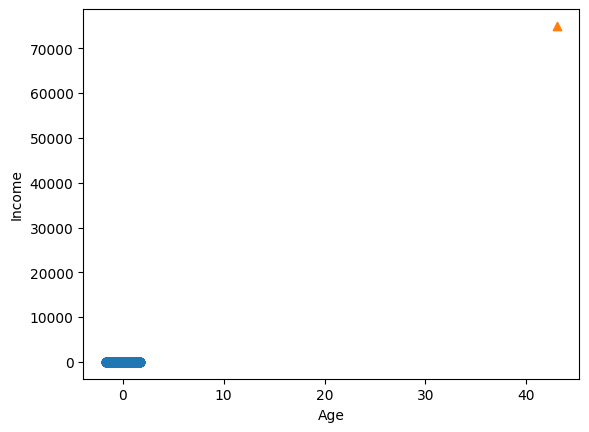

In [ ]:
# 산점도
plt.scatter(X_train_scale[:,0], X_train_scale[:,1])
plt.scatter(43, 75000, marker = '^')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [ ]:
new = ([43, 75000] - mean) / std
new

array([-0.1191,  0.1328])

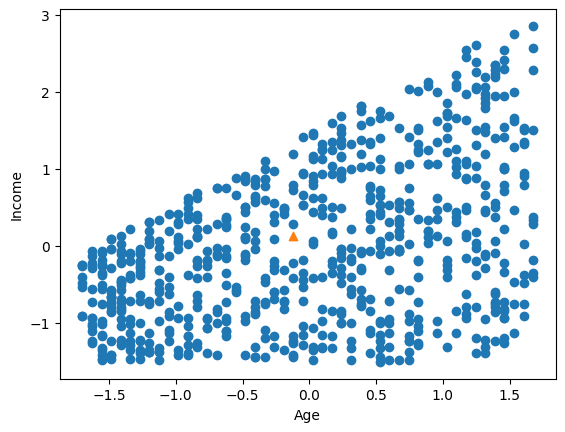

In [ ]:
# 산점도
plt.scatter(X_train_scale[:,0], X_train_scale[:,1])
plt.scatter(new[0], new[1], marker = '^')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [ ]:
# 새로운 데이터 훈련
knn.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [ ]:
distance, indexes = knn.kneighbors([new])

In [ ]:
indexes

array([[102, 353, 529,  96, 688]])

In [ ]:
distance

array([[0.1503, 0.1552, 0.1583, 0.1814, 0.2282]])

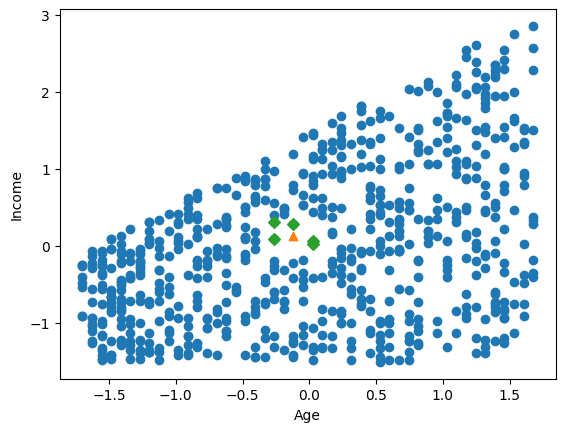

In [ ]:
# 산점도
plt.scatter(X_train_scale[:,0], X_train_scale[:,1])
plt.scatter(new[0], new[1], marker = '^')
plt.scatter(X_train_scale[indexes,0], X_train_scale[indexes,1], marker = 'D')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

## KNN - 데이터 분할

### 데이터 준비

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Enroll  1000 non-null   int64
 1   Age     1000 non-null   int64
 2   Income  1000 non-null   int64
 3   Hours   1000 non-null   int64
dtypes: int64(4)
memory usage: 31.4 KB


In [ ]:
# 데이터 분할
# 전체 데이터
X = df.loc[:,['Age', 'Income', 'Hours']]
y = df['Enroll']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (1000, 3)
y 데이터:  (1000,)


In [ ]:
# 데이터 분할 = 훈련 데이터 / 테스트 데이터 = 7:3
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)
print("train 데이터: ", X_train.shape)
print("test 데이터: ", X_test.shape)

train 데이터:  (700, 3)
test 데이터:  (300, 3)


In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
X_train_scale = standard.fit_transform(X_train)
X_test_scale = standard.transform(X_test)

In [ ]:
# 모델 적용
from sklearn.neighbors import KNeighborsClassifier
# 기본값 k = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [ ]:
# 정확도
print(knn.score(X_train_scale, y_train))
print(knn.score(X_test_scale, y_test))

0.9328571428571428
0.9333333333333333


In [ ]:
y_train_pred = knn.predict(X_train_scale)
y_test_pred = knn.predict(X_test_scale)

In [ ]:
print(y_train_pred[:5])
print(y_train.values[:5])

[0 1 1 0 0]
[0 1 0 0 0]


In [ ]:
print(y_test_pred[:5])
print(y_test.values[:5])

[0 0 1 0 0]
[0 0 1 0 0]


In [ ]:
y_train_proba = knn.predict_proba(X_train_scale)
y_test_proba = knn.predict_proba(X_test_scale)

In [ ]:
print(y_train_proba[:5])
print(y_test_proba[:5])

[[0.8 0.2]
 [0.  1. ]
 [0.4 0.6]
 [1.  0. ]
 [1.  0. ]]
[[1.  0. ]
 [0.8 0.2]
 [0.  1. ]
 [1.  0. ]
 [0.8 0.2]]


In [ ]:
# 성능평가
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))

[[386  31]
 [ 16 267]]
[[169  11]
 [  9 111]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       417
           1       0.90      0.94      0.92       283

    accuracy                           0.93       700
   macro avg       0.93      0.93      0.93       700
weighted avg       0.93      0.93      0.93       700

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       180
           1       0.91      0.93      0.92       120

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

